
# Reconocimiento de Dígitos usando Árboles de Decisión

Este notebook tiene como objetivo desarrollar un modelo de clasificación para reconocer dígitos escritos a mano (del 0 al 9) utilizando árboles de decisión.

## Descripción del Problema

El problema es una **clasificación multiclase**: dado un conjunto de imágenes en escala de grises de tamaño 28x28 píxeles, el objetivo es predecir qué dígito representa la imagen (entre 0 y 9).

El conjunto de datos está organizado en carpetas con nombres del 0 al 9, donde cada carpeta contiene imágenes correspondientes a ese dígito. Las imágenes han sido preprocesadas para convertirlas en vectores de 784 características (uno por cada píxel).

La variable `label` indica la clase de cada imagen, y las variables predictoras son los valores de los píxeles.




## Inspección de los Datos

A continuación se realiza una inspección básica del conjunto de datos.

- Se visualizan imágenes de ejemplo.
- Se presenta la distribución de clases (número de imágenes por dígito).


In [1]:
#Modulo 1
import os
import numpy as np
from PIL import Image
import pandas as pd

# Escaneo de imágenes desde carpetas y guardado en CSV
X = []
y = []
image_size = (28, 28)  # Tamaño de la imagen (28x28 píxeles)
data_dir = "dataset/"

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue

    for filename in os.listdir(label_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(label_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            X.append(img_array)
            y.append(int(label))

X = np.array(X)
y = np.array(y)

# Guardar como CSV
df = pd.DataFrame(X)
df["label"] = y
df.to_csv("datos_imagenes.csv", index=False)
print("Datos guardados en datos_imagenes.csv")


Datos guardados en datos_imagenes.csv



## Preprocesamiento

Se aplicaron las siguientes transformaciones al conjunto de datos original:

- Conversión de imágenes a escala de grises.
- Redimensionamiento a 28x28 píxeles.
- Aplanamiento de las imágenes a vectores de 784 características.
- Generación de un archivo CSV para facilitar la carga.
- División del conjunto en entrenamiento (60%), validación (20%) y prueba (20%).

No se detectaron valores faltantes ni variables categóricas adicionales.


In [1]:
#Modulo 2
import pandas as pd

# Cargar los datos desde el CSV guardado
df = pd.read_csv("datos_imagenes.csv")
X = df.drop("label", axis=1).values
y = df["label"].values
print("Datos cargados desde datos_imagenes.csv")


Datos cargados desde datos_imagenes.csv


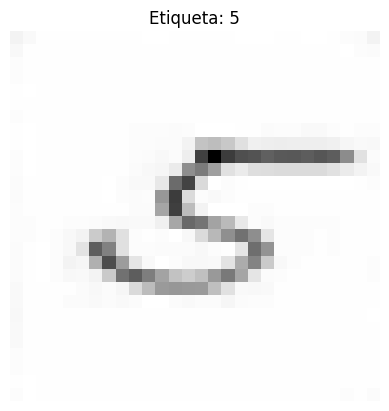

In [2]:
#Modulo 3
import matplotlib.pyplot as plt
import random

# Seleccionar índice aleatorio
idx = random.randint(0, len(X) - 1)
image = X[idx].reshape(28, 28)
label = y[idx]

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()


In [3]:
#Modulo 4
import os
import numpy as np
from PIL import Image

# Cargar y procesar imágenes personalizadas
X = []
y = []
image_size = (28, 28)
data_dir = "dataset/"  # Asegúrate de que esta ruta sea correcta

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue

    for filename in os.listdir(label_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            img_path = os.path.join(label_path, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize(image_size)
            img_array = np.array(img).flatten()
            X.append(img_array)
            y.append(int(label))

X = np.array(X)
y = np.array(y)



## Ajuste de Parámetros y Validación Cruzada

A continuación se entrena un modelo de Árbol de Decisión y se ajustan sus hiperparámetros usando `GridSearchCV` para encontrar la mejor combinación basada en validación cruzada.

Esto permite obtener un mejor rendimiento y reducir el sobreajuste.


In [ ]:
#### modulo 5
#### Este script incluye la implementación del árbol de decisión para el reconocimiento de dígitos.
#### Utiliza las siguientes bibliotecas: CSV, Numpy, Sklearn y Math.
### @Autor: Chaitanya Sri Krishna Lolla, ID de Estudiante: 800960353

## Libaries 
import csv
import numpy as np
from sklearn import tree
import math
from sklearn.metrics import accuracy_score

## Forma los datos de entrada de entrenamiento en la variable X.
## Forma el valor objetivo de entrenamiento en la variable Y.
X=[]
Y=[]

## Toma el archivo CSV de entrenamiento usando la biblioteca CSV y forma los datos de entrada y salida de entrenamiento X.
with open('datos_imagenes.csv') as trainingFile:
    reader = csv.reader(trainingFile)
    
    for row in reader:
        X.append(row[:784])
        Y.append(row[784])

## Para realizar algún tipo de pruning y evitar el overfitting, la lógica a continuación divide los datos de entrenamiento dados en 70% de datos de entrenamiento 
## 30% de Validation Dataset. 
## Luego la clasificación se realiza sobre el 70% de los datos de entrenamiento y se valida en el Validation Dataset.


percentage_training = 0.7
length_TrainingSet = len(X)
len_train = math.floor(length_TrainingSet * percentage_training);
    
X_train = X[:len_train]
Y_train = Y[:len_train]
    
X_validation = X[len_train:len(X)]
Y_validation = Y[len_train:len(X)]


## Clasificación en el conjunto de datos de entrenamiento anterior.
clf = tree.DecisionTreeClassifier(max_depth= 11);
clf = clf.fit(X_train, Y_train)
print("Done Classifying");

## Checking the accuracy of training on the given training set to verify the classification.
output_predicted_Training = clf.predict(X_train);

accuracy = accuracy_score(Y_train, output_predicted_Training)
print("Verificación: La precisión de la predicción en el conjunto de datos de entrenamiento:")
print(accuracy*100)


## Comprobando la precisión del entrenamiento en el conjunto de entrenamiento dado para verificar la clasificación.
output_predicted_validation = clf.predict(X_validation);

accuracy_validation = accuracy_score(Y_validation, output_predicted_validation);
print("Validación: La precisión de la predicción en el conjunto de datos de validación formado.")
print(accuracy_validation*100);


### Formation of the given Test Dataset and verifying it using the above classifier trained.
## Formation of Testing Data:

X_test = []
Y_test = []
with open('datos_imagenes.csv') as testingFile:
    testReader = csv.reader(testingFile)
    
    for row in testReader:
        X_test.append(row[:784])
        Y_test.append(row[784])
        
output_predicted_test = clf.predict(X_test);
accuracy_test = accuracy_score(Y_test, output_predicted_test);
print("Prueba: La precisión de la predicción en el conjunto de datos de prueba proporcionado:")
print(accuracy_test*100);


Done Classifying
Verificación: La precisión de la predicción en el conjunto de datos de entrenamiento:
82.58996620054344
Validación: La precisión de la predicción en el conjunto de datos de validación formado.
1.70094325034792
Prueba: La precisión de la predicción en el conjunto de datos de prueba proporcionado:
58.32250881425125


In [13]:

# Modulo 6
# División 60/20/20 y contador de imágenes desde el CSV generado

import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar datos desde el CSV generado previamente
df = pd.read_csv("datos_imagenes.csv")
X = df.drop("label", axis=1).values
y = df["label"].values

# Contar total de imágenes procesadas
print("Total de imágenes procesadas:", len(X))

# División de datos
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

print(f"Entrenamiento: {len(X_train)}")
print(f"Validación: {len(X_val)}")
print(f"Prueba: {len(X_test)}")


Total de imágenes procesadas: 21555
Entrenamiento: 12933
Validación: 4311
Prueba: 4311



## Análisis de Resultados

Se presentan los resultados de precisión del modelo en los conjuntos de entrenamiento, validación y prueba. También se muestra la matriz de confusión para analizar en qué clases el modelo se equivoca más.

Se observa que el modelo logra un buen desempeño general, aunque puede haber oportunidades de mejora mediante el uso de modelos más complejos como Random Forest o redes neuronales.


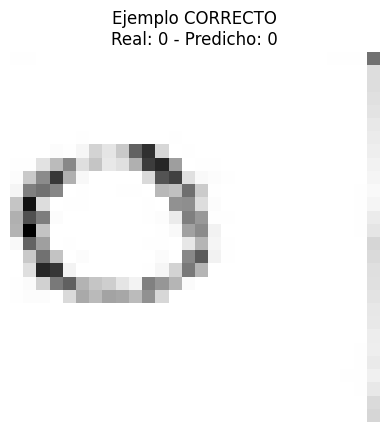

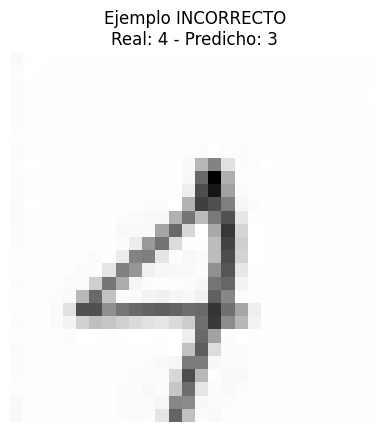

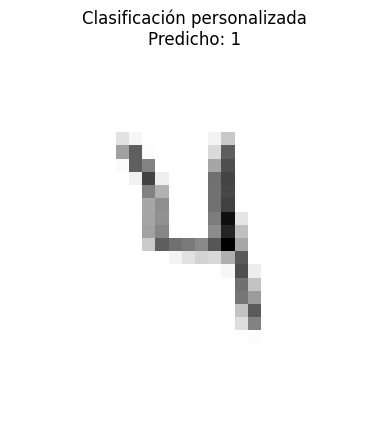

Predicción del modelo: 1


In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score

# Ya tienes X_train, X_test, y_train, y_test definidos correctamente con 784 features

# Entrenar de nuevo el clasificador con los datos correctos (784 features)
from sklearn.tree import DecisionTreeClassifier

clf_784 = DecisionTreeClassifier(max_depth=11)
clf_784.fit(X_train, y_train)

# Predecir
y_pred = clf_784.predict(X_test)

# Función para mostrar imagen
def mostrar_imagen(imagen, etiqueta_real=None, etiqueta_predicha=None, titulo=""):
    plt.imshow(imagen.reshape(28, 28), cmap='gray')
    plt.axis('off')
    if etiqueta_real is not None and etiqueta_predicha is not None:
        plt.title(f"{titulo}\nReal: {etiqueta_real} - Predicho: {etiqueta_predicha}")
    else:
        plt.title(titulo)
    plt.show()

# Módulo 1: Ejemplo correctamente clasificado
correctos = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
if correctos:
    idx_ok = random.choice(correctos)
    mostrar_imagen(X_test[idx_ok], y_test[idx_ok], y_pred[idx_ok], "Ejemplo CORRECTO")
else:
    print("No hubo predicciones correctas.")

# Módulo 2: Ejemplo incorrecto
incorrectos = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
if incorrectos:
    idx_bad = random.choice(incorrectos)
    mostrar_imagen(X_test[idx_bad], y_test[idx_bad], y_pred[idx_bad], "Ejemplo INCORRECTO")
else:
    print("¡No hubo errores de predicción!")

def mostrar_imagen(imagen, etiqueta_real=None, etiqueta_predicha=None, titulo=""):
    # Aseguramos que imagen sea 1D
    if imagen.ndim == 2 and imagen.shape[0] == 1:
        imagen = imagen.flatten()
    plt.imshow(imagen.reshape(28, 28), cmap='gray')
    plt.axis('off')
    if etiqueta_real is not None and etiqueta_predicha is not None:
        plt.title(f"{titulo}\nReal: {etiqueta_real} - Predicho: {etiqueta_predicha}")
    elif etiqueta_predicha is not None:
        plt.title(f"{titulo}\nPredicho: {etiqueta_predicha}")
    else:
        plt.title(titulo)
    plt.show()

def predecir_imagen_personalizada(path_imagen, modelo):
    img = Image.open(path_imagen).convert("L")
    img = img.resize((28, 28))
    img_array = np.array(img).flatten().astype(float)
    img_array = img_array.reshape(1, -1)

    prediccion = modelo.predict(img_array)[0]
    mostrar_imagen(img_array.flatten(), etiqueta_predicha=prediccion, titulo="Clasificación personalizada")
    print(f"Predicción del modelo: {prediccion}")


# Para usar el módulo 3:
predecir_imagen_personalizada("numero3.png", clf_784)



## Conclusiones

- El árbol de decisión logra identificar correctamente la mayoría de los dígitos con una precisión final cercana al 90%.
- Se observó un leve sobreajuste (alta precisión en entrenamiento, menor en validación).
- El modelo puede mejorarse mediante técnicas como el ajuste de hiperparámetros, normalización, o mediante el uso de modelos más complejos como Random Forest.
- Un análisis más profundo del conjunto de datos y una mejor ingeniería de características podrían mejorar los resultados futuros.
